In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score,classification_report
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv("../input/water-potability/water_potability.csv")
df.head()

# **Missing Value Analysis**


 ***The missing values count of each column in the data frame is shown below.***
 
 ***Missing values are replaced for each column by the mean of the class to which that sample belongs.***

In [ ]:
df.isnull().sum()

In [ ]:
df = df.fillna(df.groupby('Potability').transform('mean'))

# **Data Analysis**

* In order to find relationship type(weak,moderate,strong), for each column pearson_coefficient and p_values were calculated.
* Threshold value for determining significance is 0.05.

***If p_value<0.05 there is a linear relationship between two varaiables (statistically significant)***

***If p_value>0.05 there is no linear relationship between two varaiables (not statistically significant)***
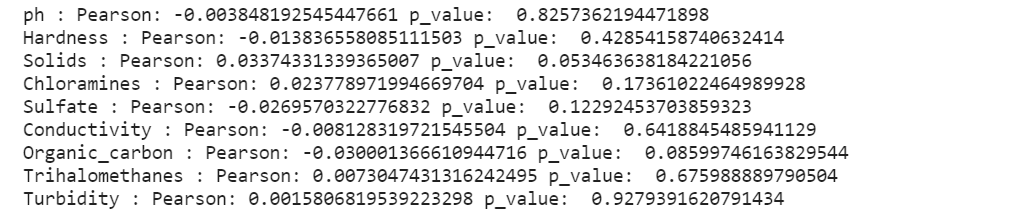


**Visualization of relationship between variables**

Regplot function that is inside the seaborn library is used for the visualization of relationships.
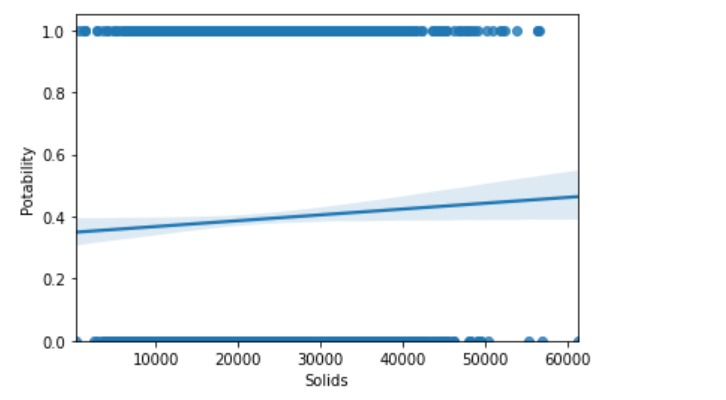

*According to this image we can say there is no linear relationship between Solids feature and Potability.*

In [ ]:
sns.regplot(x="ph", y="Potability", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="Solids", y="Potability", data=df)
plt.ylim(0,)

In [ ]:
plt.pcolor(df, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:

for i,j  in enumerate(df.columns):
    pearson_coefficient, p_val = stats.pearsonr(df[str(j)], df['Potability'])
    print(str(j),":","Pearson:",pearson_coefficient,'p_value: ',p_val)


# Classification

**Classifiers:**
* Decision Tree
* Naive Bayes
* Logistic Regression
* GradientBoosting
* Random Forest

In [ ]:
X=np.asarray(df.drop(['Potability'],axis=1))
y=np.asarray(df['Potability'])

In [ ]:

le = preprocessing.LabelEncoder()
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

y=le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

***Decision Tree Classifier***

In [ ]:

classifier=tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print(accuracy_score(y_test,predictions))
print(precision_score(y_test,predictions))

***Naive Bayes Classifier***

In [ ]:

model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted,average='micro'))

print(classification_report(y_test, predicted))

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, pred))


***Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=30,max_depth=2,random_state=0)
gb.fit(X_train, y_train)
predicted = gb.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test, predicted))
print("Precision score: ",precision_score(y_test, predicted))
print(classification_report(y_test, predicted))

***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)

random_forest.fit(X_train, y_train)
prediction=random_forest.predict(X_test)
print("Accuracy  score: ",accuracy_score(y_test, prediction))
print("Precision score: ",precision_score(y_test, prediction))
print(classification_report(y_test, prediction))


In [ ]:
feature_imp = pd.Series(random_forest.feature_importances_,index=df.columns[0:9]).sort_values(ascending=False)
feature_imp

# Classifier Evaluation

* **Decision Tree**: *Accuracy:* 73.47, *Precision:* 64.7
* **Naive Bayes**: *Accuracy:* 63.1, *Precision:* 63.1
* **Logistic Regression**: *Accuracy:* 62.8
* **Gradient Boosting**: *Accuracy:* 76.5, *Precision:* 94.1
* **Random Forest**: *Accuracy:* 81.09, *Precision:* 82.25